In [145]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np



In [146]:
# read data
X = pd.read_csv('DATA\\X_data.csv')
y = pd.read_csv('DATA\\y_data.csv')

### Trực quan hóa dữ liệu khi bỏ nhãn dữ liệu với UMAP

In [147]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [148]:
import umap

reducer = umap.UMAP(n_components=16)
X_t = reducer.fit_transform(X_scaled)


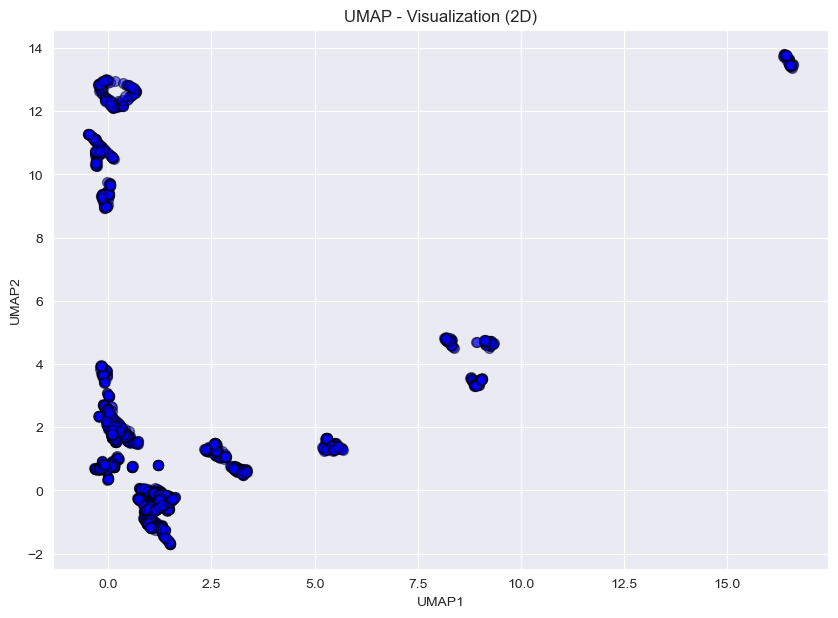

In [149]:
# Visualize data
import matplotlib.pyplot as plt

# Visualize data with 2 principal components
plt.figure(figsize=(10, 7))
plt.scatter(X_t[:, 0], X_t[:, 1], c='blue', edgecolor='k', s=50, alpha=0.5)
plt.title("UMAP - Visualization (2D)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.grid(True)
plt.savefig('Img\\Clutering_UMAP_2D.png')
plt.show()

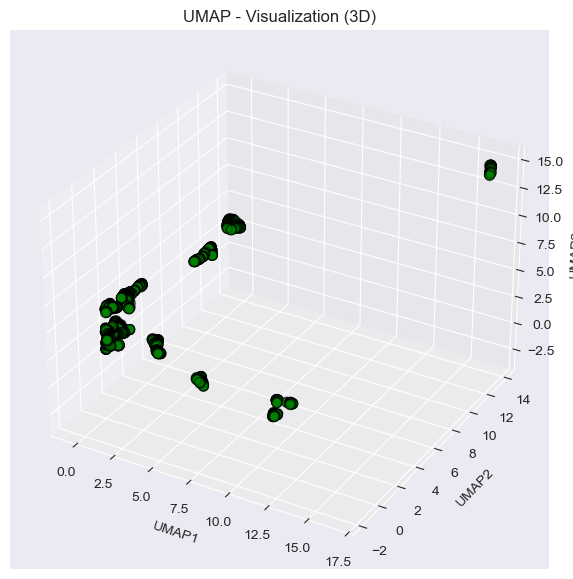

In [150]:
# Visualize data with 3 principal components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_t[:, 0], X_t[:, 1], X_t[:, 2], c='green', edgecolor='k', s=50, alpha=0.5)
ax.set_title("UMAP - Visualization (3D)")
ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")
ax.set_zlabel("UMAP3")
plt.grid(True)
plt.savefig('Img\\Clutering_UMAP_3D.png')
plt.show()


### KMeans

In [151]:
# KMeans model
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X_t)

kmeans_labels = kmeans.fit_predict(X_t)

C:\Users\buian\.conda\envs\Py310-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\buian\.conda\envs\Py310-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [152]:
# labels of KMeans
centers = kmeans.cluster_centers_

print(centers)

[[ 1.0986772  -0.8054633   4.3416543   4.1420407   9.634337    9.038574
   5.511889    3.3895254   4.3110733   4.1957326   3.3885522   6.1037993
   8.154639    6.892261    3.6582654   6.330278  ]
 [ 0.32525742  1.3258691   5.0821085   5.4912634   9.601568    0.7705624
   5.704525    4.3540072   4.141341    4.643155    3.9008276   5.9393606
   8.322208    6.5532227   4.194759    6.7683873 ]
 [16.468748   13.617413   14.580765    4.342964   11.811214    6.0324025
   4.5087156  -0.8599689   5.966221    1.8014619   2.6746807   9.288627
  13.236706    6.7343025   2.7125866   6.1514297 ]
 [-0.18641245 10.356048    2.9148438   8.584726    9.284878    4.34167
   5.083377    3.3818774   5.380625    2.873151    4.177255    6.351834
   8.922004    7.0040674   3.2325633   6.770714  ]
 [ 3.5563335   1.1271539   2.0321288   4.621142    9.526149    6.160146
   9.413439    2.3901663   9.678582    2.5442386   3.8707957   5.6106277
   6.3672643   6.115816    2.4721897   6.1725335 ]
 [ 0.13159645 12.5538

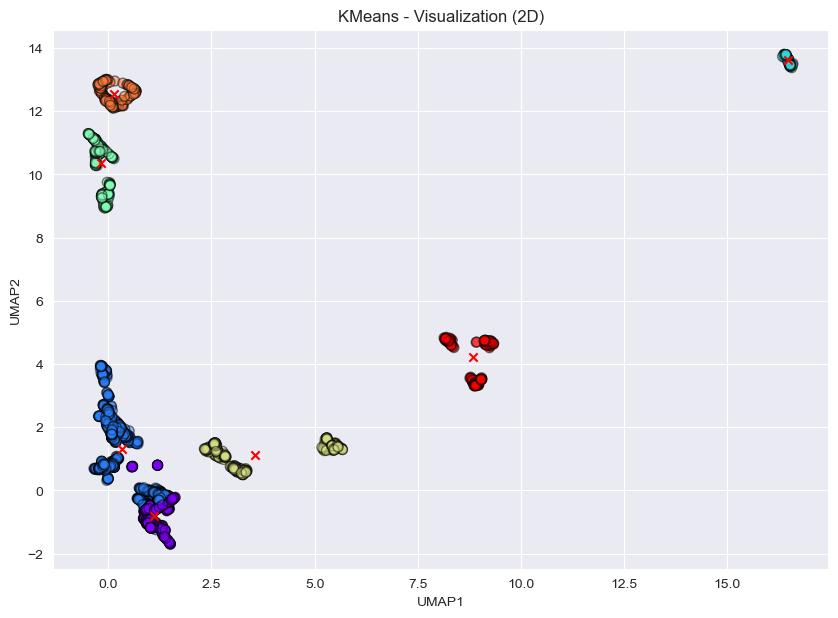

In [153]:
# Visualize KMeans
plt.figure(figsize=(10, 7))
plt.scatter(X_t[:, 0], X_t[:, 1], c=kmeans_labels, cmap='rainbow', edgecolor='k', s=50, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
plt.title("KMeans - Visualization (2D)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.grid(True)
plt.savefig('Img\\KMeans_UMAP_2D.png')
plt.show()

In [154]:
# Tính Silhouette Score và Davies-Bouldin Index
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
sil_score = silhouette_score(X_t, kmeans_labels)
print(f"Silhouette Score: {sil_score:.4f}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(X_t, kmeans_labels)
print(f"Davies-Bouldin Index: {db_index:.4f}")

Silhouette Score: 0.6114
Davies-Bouldin Index: 0.5271


In [155]:

import pandas as pd

# Tạo DataFrame để dễ phân tích
df = pd.DataFrame({'Cluster': kmeans_labels, 'Output': y.values.flatten()})

# Đếm tần suất nhãn trong mỗi cụm
cluster_counts = df.groupby(['Cluster', 'Output']).size().unstack(fill_value=0)
print(cluster_counts)

Output     0   1    2    3    4    5    6
Cluster                                  
0         46  60  159   71    1   41  121
1         89  81  164  207    0  155  128
2          3  10    0    0    0   35    1
3          0   0    3    1  200    0    0
4        127  79    6    1    1   34   10
5          0   0    0    0  121    0    1
6          7  57   19   17    1   25   29


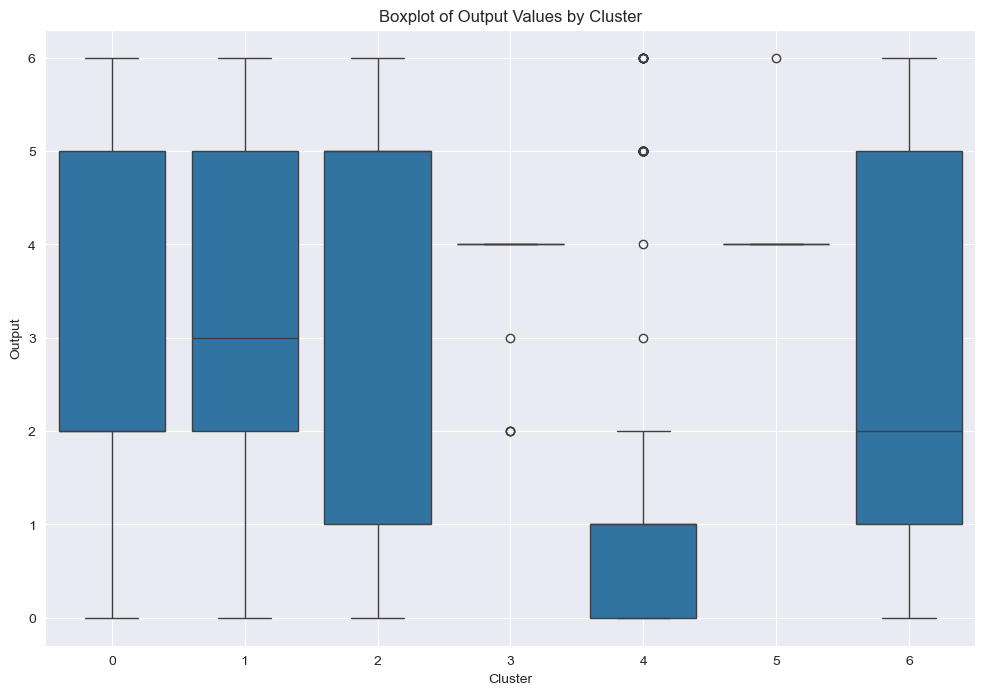

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Biểu đồ hộp cho từng cụm
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Output', data=df)
plt.title("Boxplot of Output Values by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Output")
plt.grid(True)
plt.savefig('Img\\Boxplot_Clustering.png')
plt.show()

### DBSCAN

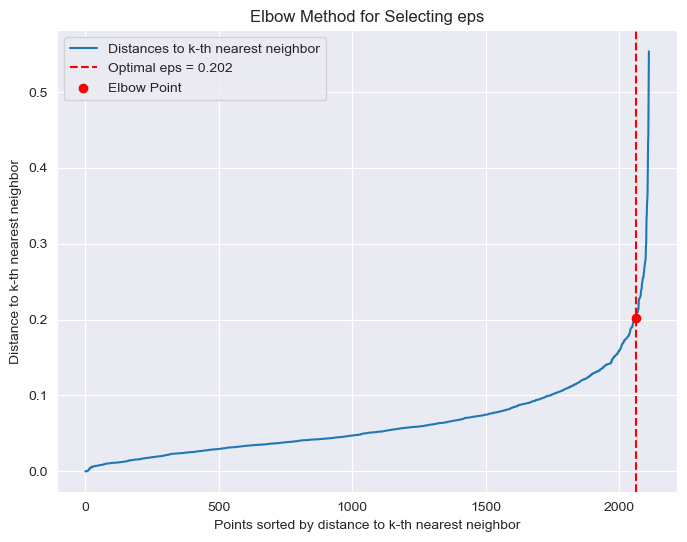

Optimal eps: 0.2024199664592743


In [157]:
from sklearn.cluster import DBSCAN

# find optimal eps
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# Số lượng lân cận k (k-th neighbor)
min_samples = 16 + 1  # Sử dụng số thành phần PCA hoặc giá trị tùy chỉnh
neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(X_t)  # X_t là dữ liệu sau khi giảm chiều với PCA
distances, indices = nbrs.kneighbors(X_t)

# Tính khoảng cách tới k-th nearest
distances = np.sort(distances, axis=0)[:, 1]

# Sử dụng Kneedle Algorithm để tìm điểm gập (elbow)
kneedle = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
eps = distances[kneedle.knee]  # Giá trị eps tại "elbow"

# Vẽ đồ thị và trực quan hóa eps tối ưu
plt.figure(figsize=(8, 6))
plt.plot(distances, label="Distances to k-th nearest neighbor")
plt.axvline(x=kneedle.knee, color='r', linestyle='--', label=f"Optimal eps = {eps:.3f}")
plt.scatter(kneedle.knee, eps, color='red', label="Elbow Point", zorder=5)
plt.title("Elbow Method for Selecting eps")
plt.xlabel("Points sorted by distance to k-th nearest neighbor")
plt.ylabel("Distance to k-th nearest neighbor")
plt.legend()
plt.grid(True)
plt.savefig('Img\\DBScan_Elbow_Method.png')
plt.show()

# In giá trị eps
print(f"Optimal eps: {eps}")

In [158]:
# DBScan
dbscan = DBSCAN(eps=5, min_samples=min_samples)
dbscan.fit(X_t)

DBSCAN(eps=5, min_samples=17)

In [159]:
dbscan_labels = dbscan.fit_predict(X_t)
dbscan_labels

array([0, 1, 1, ..., 5, 5, 5])

In [160]:
print(np.unique(dbscan_labels))

[-1  0  1  2  3  4  5  6]


Number of clusters: 7
Number of noise points: 18


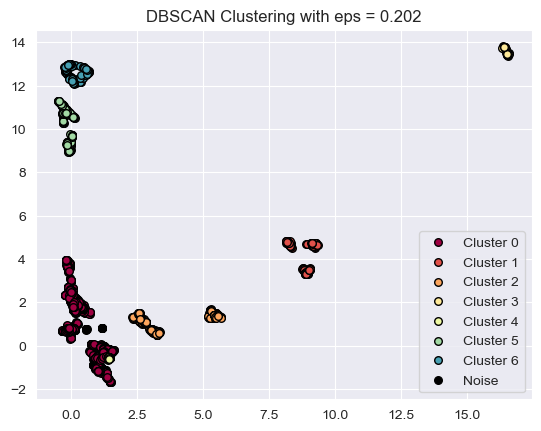

In [161]:

# visualizing the clusters

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Trực quan hóa các cụm
unique_labels = set(dbscan_labels)

# Tạo danh sách màu sắc cho các cụm
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Điểm nhiễu (noise) được gắn nhãn là -1
        color = [0, 0, 0, 1]  # Màu đen cho noise

    # Lấy các điểm thuộc về cụm hiện tại
    cluster_points = (dbscan_labels == label)
    plt.scatter(
        X_t[cluster_points, 0], X_t[cluster_points, 1],
        c=[color], label=f"Cluster {label}" if label != -1 else "Noise",
        s=30, edgecolor='k'
    )

plt.title(f"DBSCAN Clustering with eps = {eps:.3f}")
plt.legend()
plt.grid(True)
plt.savefig('Img\\DBScan_Clustering_UMAP.png')
plt.show()


In [162]:
from sklearn.metrics import silhouette_score

# Kiểm tra nếu DBSCAN có cụm hợp lệ
if len(set(dbscan_labels)) > 1:
    sil_score = silhouette_score(X_t, dbscan_labels)
    print(f"Silhouette Score: {sil_score:.4f}")
else:
    print("DBSCAN không tạo được cụm hợp lệ.")



Silhouette Score: 0.4990
